# **Swahili Question Answering (QA) System**

## 🔍 **1.0 Business Understanding**
---
In the era of global digital transformation, access to language-based AI tools has become essential for inclusive knowledge dissemination. However, African languages, including Swahili—spoken by over 100 million people—remain underrepresented in AI advancements. There is a significant gap in question-answering (QA) systems for Swahili, which hinders educational, governmental, and healthcare access for Swahili-speaking populations. This project seeks to develop a robust QA system that can understand and answer fact-based questions in Swahili, helping bridge the digital knowledge divide for East Africa.

### ⚠️ **1.1 Challenges**

Key challenges include:

1. Lack of large-scale annotated Swahili QA datasets
2. Limited availability of pre-trained Swahili NLP models
3. High resource demands for training deep learning models
4. Linguistic complexity and variation within Swahili dialects
5. Need for domain-specific performance (education, healthcare, governance)

### 💡 **1.2 Proposed Solution**

To address these challenges, we propose:

1. Fine-tuning multilingual transformer models (e.g., mBERT, AfriBERTa) using Swahili datasets
2. Utilizing data augmentation techniques such as back-translation to expand the training set
3. Engineering linguistic features such as context-question overlap and token similarity
4. Evaluating model performance across various question types
5. Deploying a user-friendly web-based interface for real-time Swahili question answering

### ✅ **1.3 Conclusion**

By creating an intelligent QA system for Swahili, this project promotes equitable access to information and builds foundational infrastructure for AI in low-resource languages. The tool will empower Swahili speakers in education, public service, and community development through reliable, machine-generated answers to fact-based queries.

### 📌 **1.4 Problem Statement**

There is a lack of intelligent, real-time question-answering systems for Swahili, limiting access to structured information for millions in East Africa. As Shujaa Data Analytics, we have been contracted to develop a machine learning-based QA model that can interpret questions in Swahili and return accurate answers from a given context. The current manual processes of accessing knowledge are slow and language-restrictive, necessitating an automated, Swahili-native solution.

### 🎯 **1.5 Objectives**

1. To analyze question and context patterns in Swahili QA datasets
2. To extract and engineer features (e.g., question length, context overlap) for model input
3. To fine-tune a transformer-based model on Swahili QA data
4. To evaluate model accuracy across different question types and linguistic structures
5. To build and deploy a web-based interface for live QA in Swahili

## 📊 **2.0 Data Understanding**
---
### 🌐 **2.1 Data Source**

The dataset used is from KenSwQuAD, a curated Swahili QA dataset comprising 7,347 entries. It is designed to support machine learning tasks such as reading comprehension and question answering, particularly in low-resource language settings. The dataset is accessible at: KenSwQuAD GitHub (URL for illustration).

### 🧾 **2.2 Column Description**

Key features in the dataset include:

- `Story_ID`: Unique identifier for the source passage
- `context`: A paragraph of Swahili text providing information for the QA task
- `question`: A fact-based question in Swahili related to the context
- `answer`: The correct answer span within the context

### 📈 **2.3 Exploratory Data Analysis**

Let's load the data and perform initial exploration:

In [1]:
# import libraries
import unicodedata
import collections
import pandas as pd
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datasets import Dataset
from sklearn.model_selection import train_test_split
#from transformers import AutoTokenizer, AutoModelForQuestionAnswering, TrainingArguments, Trainer
#from transformers import pipeline
#import evaluate

c:\Users\HP\anaconda3\envs\ds-env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Load dataset
df = pd.read_csv("data/Swahili_train.csv")
df.head()

,Unnamed: 0,Story_ID,context,question,answers
0,0,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni katika nchi ipi kilimo ni muhimu,"{'text': array(['Kenya'], dtype=object)}"
1,1,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Mifugo hutupa nini,"{'text': array(['mbolea'], dtype=object)}"
2,2,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Asilia kubwa ya wakenya wanapenda nini,"{'text': array(['Mahindi'], dtype=object)}"
3,3,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni aslimia gani ya vifaa vinavyouzwa sokoni,"{'text': array(['80%'], dtype=object)}"
4,4,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni vipi kilimo hupunguza usafiri wa watu kutok...,{'text': array(['Kwa vile watu watajipa kazi w...


In [3]:
# Display columns
df.columns

Index(['Unnamed: 0', 'Story_ID', 'context', 'question', 'answers'], dtype='object')

In [4]:
# Remove extra unnamed columns
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Story_ID,context,question,answers
0,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni katika nchi ipi kilimo ni muhimu,"{'text': array(['Kenya'], dtype=object)}"
1,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Mifugo hutupa nini,"{'text': array(['mbolea'], dtype=object)}"
2,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Asilia kubwa ya wakenya wanapenda nini,"{'text': array(['Mahindi'], dtype=object)}"
3,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni aslimia gani ya vifaa vinavyouzwa sokoni,"{'text': array(['80%'], dtype=object)}"
4,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni vipi kilimo hupunguza usafiri wa watu kutok...,{'text': array(['Kwa vile watu watajipa kazi w...


In [5]:
# Display shape of dataset
df.shape

(7347, 4)

In [6]:
# Examine Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347 entries, 0 to 7346
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Story_ID  7347 non-null   object
 1   context   7347 non-null   object
 2   question  7347 non-null   object
 3   answers   7347 non-null   object
dtypes: object(4)
memory usage: 229.7+ KB


In [7]:
# Check for duplicates
df.duplicated(subset=[col for col in df.columns if col != 'answers']).sum()

np.int64(9)

In [8]:
# Convert string in 'answers' column to Python dict
def clean_array_string(s):
    # Replace NumPy-style arrays with Python lists: e.g. array(['Kenya'], dtype=object) → ['Kenya']
    s = re.sub(r"array\((\[.*?\])\s*,\s*dtype=object\)", r"\1", s)
    return ast.literal_eval(s)


df['answers'] = df['answers'].astype(str).apply(clean_array_string)
df.head()

,Story_ID,context,question,answers
0,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni katika nchi ipi kilimo ni muhimu,{'text': ['Kenya']}
1,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Mifugo hutupa nini,{'text': ['mbolea']}
2,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Asilia kubwa ya wakenya wanapenda nini,{'text': ['Mahindi']}
3,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni aslimia gani ya vifaa vinavyouzwa sokoni,{'text': ['80%']}
4,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni vipi kilimo hupunguza usafiri wa watu kutok...,{'text': ['Kwa vile watu watajipa kazi wenyewe']}


In [9]:
# Check structure of cleaned answer feature
df['answers'].apply(lambda x: isinstance(x, dict) and 'text' in x).value_counts()


answers
True    7347
Name: count, dtype: int64

In [10]:
# Display unique stories
df['Story_ID'].value_counts()

Story_ID
3830_swa    13
3213_swa    12
3625_swa    10
3263_swa    10
3235_swa    10
            ..
5205_swa     5
5206_swa     5
5207_swa     5
5208_swa     5
4878_swa     5
Name: count, Length: 1410, dtype: int64

In [11]:
# Add features
# Token count per context, question, answer
df['context_length'] = df['context'].apply(lambda x: len(x.split()))
df['question_length'] = df['question'].apply(lambda x: len(x.split()))
df['answer_length'] = df['answers'].apply(lambda x: len(x['text'][0].split()))

# how many words in the question are found in the context
df['overlap'] = df.apply(lambda row: sum([1 for w in row['question'].split() if w in row['context'].split()]), axis=1)
df.head()

,Story_ID,context,question,answers,context_length,question_length,answer_length,overlap
0,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni katika nchi ipi kilimo ni muhimu,{'text': ['Kenya']},361,7,1,6
1,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Mifugo hutupa nini,{'text': ['mbolea']},361,3,1,2
2,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Asilia kubwa ya wakenya wanapenda nini,{'text': ['Mahindi']},361,6,1,3
3,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni aslimia gani ya vifaa vinavyouzwa sokoni,{'text': ['80%']},361,7,1,4
4,3830_swa,MANUFAA YA KILIMO KATIKA UIMARISHAJI WA UCHUMI...,Ni vipi kilimo hupunguza usafiri wa watu kutok...,{'text': ['Kwa vile watu watajipa kazi wenyewe']},361,9,6,6


In [12]:
# Statistical summary of Engineered Numerical features
df.describe()

,context_length,question_length,answer_length,overlap
count,7347.000000,7347.000000,7347.000000,7347.000000
mean,402.879270,6.280795,2.297673,3.544440
std,240.518781,2.030858,2.057967,2.033889
min,75.000000,2.000000,1.000000,0.000000
25%,246.000000,5.000000,1.000000,2.000000
50%,338.000000,6.000000,1.000000,3.000000
75%,478.000000,8.000000,3.000000,5.000000
max,1583.000000,18.000000,18.000000,17.000000


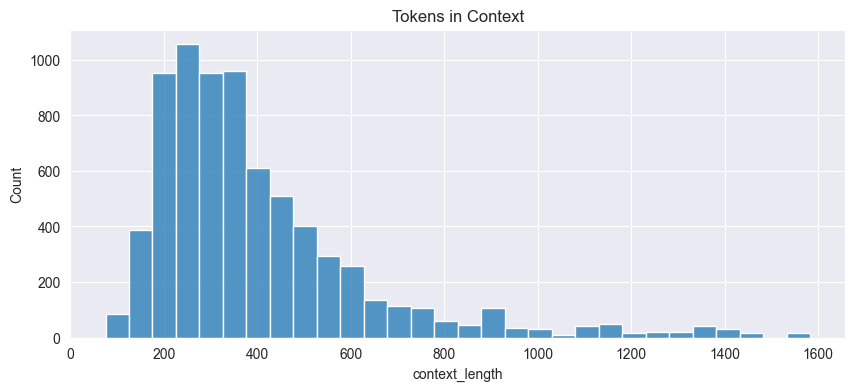

In [13]:
# Visualize context length distributions
plt.figure(figsize=(10, 4))
sns.set_style('darkgrid')
sns.histplot(df['context_length'], bins=30)
plt.title("Tokens in Context")
plt.show()


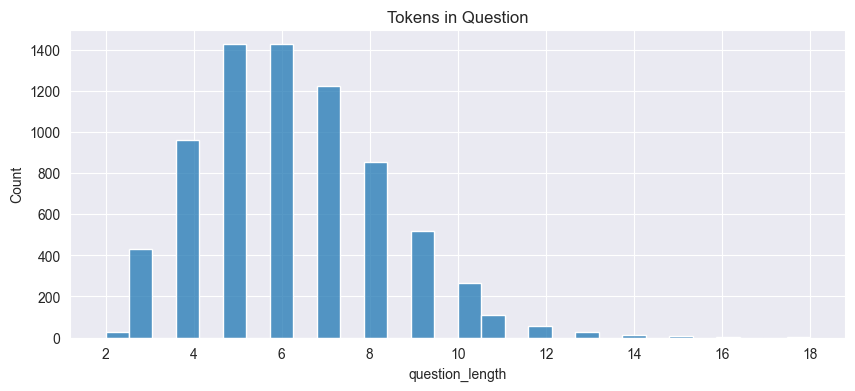

In [14]:
# Visualize question length distributions
plt.figure(figsize=(10, 4))
sns.set_style('darkgrid')
sns.histplot(df['question_length'], bins=30)
plt.title("Tokens in Question")
plt.show()

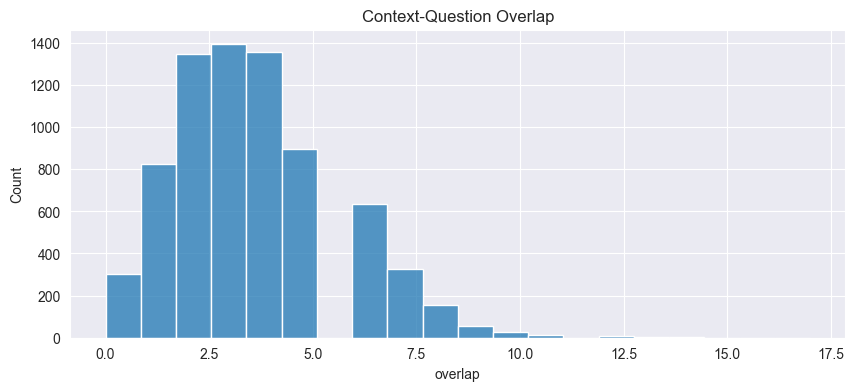

In [15]:
# Visualize overlap distributions
plt.figure(figsize=(10, 4))
sns.set_style('darkgrid')
sns.histplot(df['overlap'], bins=20)
plt.title("Context-Question Overlap")
plt.show()

## 🧹 **3.0 Data Preparation**
---

### 🧼 **3.1 Data cleaning and Preprocessing**

In [16]:
#  Drop Duplicates
df = df.drop_duplicates(subset=[col for col in df.columns if col != 'answers'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7339 entries, 0 to 7346
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Story_ID         7339 non-null   object
 1   context          7339 non-null   object
 2   question         7339 non-null   object
 3   answers          7339 non-null   object
 4   context_length   7339 non-null   int64 
 5   question_length  7339 non-null   int64 
 6   answer_length    7339 non-null   int64 
 7   overlap          7339 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 516.0+ KB


In [17]:
# Clean the text 
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Normalize Unicode to remove noise like Ã¯Â»Â¿
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

    # Lowercase
    text = text.lower()

    # Remove special characters and punctuation but KEEP digits
    text = re.sub(r"[^\w\s\d]", "", text)

    # Remove extra spaces
    text = text.strip()
    text = re.sub(r"\s+", " ", text)

    return text


df['context'] = df['context'].apply(clean_text)
df['question'] = df['question'].apply(clean_text)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7339 entries, 0 to 7346
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Story_ID         7339 non-null   object
 1   context          7339 non-null   object
 2   question         7339 non-null   object
 3   answers          7339 non-null   object
 4   context_length   7339 non-null   int64 
 5   question_length  7339 non-null   int64 
 6   answer_length    7339 non-null   int64 
 7   overlap          7339 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 516.0+ KB


In [18]:
# Split into train and Test sets
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
val_dataset = Dataset.from_pandas(val_df)

In [19]:
# display the train and test dataset
print("------Train Dataset------")
print(train_dataset)
print("")
print("------Test Dataset------")
print(test_dataset)
print("")
print("------Validation Dataset------")
print(val_dataset)

------Train Dataset------
Dataset({
    features: ['Story_ID', 'context', 'question', 'answers', 'context_length', 'question_length', 'answer_length', 'overlap', '__index_level_0__'],
    num_rows: 4696
})

------Test Dataset------
Dataset({
    features: ['Story_ID', 'context', 'question', 'answers', 'context_length', 'question_length', 'answer_length', 'overlap', '__index_level_0__'],
    num_rows: 1468
})

------Validation Dataset------
Dataset({
    features: ['Story_ID', 'context', 'question', 'answers', 'context_length', 'question_length', 'answer_length', 'overlap', '__index_level_0__'],
    num_rows: 1175
})


In [20]:
# Preprocessing function for QA train dataset data
def preprocess_train(examples, tokenizer):
    questions = [q.strip() for q in examples["question"]]
    contexts = examples["context"]
    answers = examples["answers"]

    tokenized = tokenizer(
        questions,
        contexts,
        truncation="only_second",
        max_length=512,
        stride=128,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length"
    )

    # Align answer start and end positions
    sample_mapping = tokenized.pop("overflow_to_sample_mapping")
    offset_mapping = tokenized.pop("offset_mapping")

    start_positions = []
    end_positions = []

    for i, offsets in enumerate(offset_mapping):
        input_ids = tokenized["input_ids"][i]
        cls_index = input_ids.index(tokenizer.cls_token_id)

        sample_idx = sample_mapping[i]
        answer = answers[sample_idx]
        # Calculate start_char based on the position of the answer text in the context
        start_char = contexts[sample_idx].find(answer["text"][0])
        end_char = start_char + len(answer["text"][0])

        sequence_ids = tokenized.sequence_ids(i)

        # Find the start and end of the context in the tokenized input
        context_start = sequence_ids.index(1)
        context_end = len(sequence_ids) - 1 - sequence_ids[::-1].index(1)

        # If answer is outside the current span, use [CLS] token
        if not (offsets[context_start][0] <= start_char and offsets[context_end][1] >= end_char):
            start_positions.append(cls_index)
            end_positions.append(cls_index)
        else:
            # Otherwise find token start and end
            token_start = context_start
            while token_start < context_end and offsets[token_start][0] <= start_char:
                token_start += 1
            token_end = context_end
            while token_end > context_start and offsets[token_end][1] >= end_char:
                token_end -= 1

            start_positions.append(token_start - 1)
            end_positions.append(token_end + 1)

    tokenized["start_positions"] = start_positions
    tokenized["end_positions"] = end_positions
    return tokenized

In [21]:
# Preprocessing function for QA test dataset data
def preprocess_test(examples, tokenizer):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=512,
        truncation="only_second",
        stride=128,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )
    sample_mapping = inputs.pop("overflow_to_sample_mapping")
    inputs["example_id"] = []

    for i in range(len(inputs["input_ids"])):
        inputs["example_id"].append(str(examples["Story_ID"][sample_mapping[i]]))

        sequence_ids = inputs.sequence_ids(i)
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None
            for k, o in enumerate(inputs["offset_mapping"][i])
        ]

    return inputs


## 🤖 **4.0 Modeling**
---

In [22]:
# Post-processes raw model predictions (start and end logits) to generate final answer texts.
def postprocess_qa_predictions(examples, features, predictions, tokenizer, n_best_size=20, max_answer_length=30):

    all_start_logits, all_end_logits = predictions
    example_id_to_index = {str(example["Story_ID"]): i for i, example in enumerate(examples)}
    features_per_example = collections.defaultdict(list)

    for i, feature in enumerate(features):
        features_per_example[feature["example_id"]].append(i)

    predictions_dict = {}

    for example_id, feature_indices in features_per_example.items():
        min_null_score = None
        valid_answers = []

        for idx in feature_indices:
            start_logits = all_start_logits[idx]
            end_logits = all_end_logits[idx]
            offset_mapping = features[idx]["offset_mapping"]
            input_ids = features[idx]["input_ids"]

            cls_index = input_ids.index(tokenizer.cls_token_id)
            null_score = start_logits[cls_index] + end_logits[cls_index]
            if min_null_score is None or null_score < min_null_score:
                min_null_score = null_score

            start_indexes = np.argsort(start_logits)[-1 : -n_best_size - 1 : -1]
            end_indexes = np.argsort(end_logits)[-1 : -n_best_size - 1 : -1]

            for start_index in start_indexes:
                for end_index in end_indexes:
                    if start_index >= len(offset_mapping) or end_index >= len(offset_mapping):
                        continue
                    if offset_mapping[start_index] is None or offset_mapping[end_index] is None:
                        continue
                    if end_index < start_index or end_index - start_index + 1 > max_answer_length:
                        continue

                    start_char = offset_mapping[start_index][0]
                    end_char = offset_mapping[end_index][1]
                    context = examples[example_id_to_index[example_id]]["context"]
                    valid_answers.append({
                        "score": start_logits[start_index] + end_logits[end_index],
                        "text": context[start_char:end_char]
                    })

        if valid_answers:
            best_answer = max(valid_answers, key=lambda x: x["score"])
        else:
            best_answer = {"text": ""}

        predictions_dict[example_id] = best_answer["text"]

    # Ensure one prediction per original example (including those not predicted)
    final_predictions = []
    for example in examples:
        example_id = str(example["Story_ID"])
        prediction_text = predictions_dict.get(example_id, "")
        final_predictions.append({
            "id": example_id,
            "prediction_text": prediction_text
        })

    return final_predictions


In [23]:
# Post-processes raw model predictions (start and end logits) to generate final answer texts.
def prepare_references(test_dataset):
    references = []
    for example in test_dataset:
        answer_text = example["answers"]["text"][0] if example["answers"]["text"] else ""
        context = example["context"]
        start_char = context.find(answer_text)
        if start_char == -1:
            start_char = 0
        references.append({
            "id": str(example["Story_ID"]),
            "answers": {
                "text": [answer_text],
                "answer_start": [start_char]
            }
        })
    return references


Creates a list that consists of the ground truths answer texts, their starting positions in the context and a unique alignment ID for with predictiosn